# Sales Analytics: Global Sneaker & Streetwear Market

## 1. Introduction

This project explores global retail sales data from the sneaker and streetwear market, covering the period from January to August 2022.
The dataset, sourced from Kaggle, simulates real-world e-commerce patterns for brands such as Nike, Adidas, Supreme, Yeezy, and Off-White, across high-demand categories like sneakers, hoodies, joggers, and graphic tees.

The goal of this analysis is to identify:

- Which products and product types sold the most

- How sales changed over time

- How sales compared across different countries

- Which payment methods were most commonly used

- Forecasted sales for the next month based on historical trends

These insights can benefit retail strategists, marketing teams, and inventory managers by helping them understand consumer demand patterns, anticipate upcoming sales, and make informed business decisions.

## 2. Data Overview

The dataset includes 500 clean, non-null, and unique transaction records, allowing for direct exploration without additional data cleaning.
It covers sales from several countries and over 30 product names, providing a diverse sample of the global streetwear market.

Key fields include:

- *Date* – date of the transaction

- *Country* – country of purchase

- *Gender* – customer gender

- *Product* and *Category* – product details

- *Quantity Sold* – number of units sold per transaction

- *Unit Price* and total *Amount* – pricing and revenue details

- *Payment Mode* – method used for payment

The clean, structured nature of this dataset makes it well-suited for analyzing trends in product performance, regional sales distribution, and customer purchasing behavior.

## 3. Exploratory Data Analysis

In [2]:
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For creating static visualizations
import matplotlib.pyplot as plt  # For plotting charts
import plotly.express as px  # For interactive visualizations
import warnings  # To manage warning messages

# Suppress future and deprecation warnings for cleaner output
warnings.simplefilter(action='ignore', category=(FutureWarning, DeprecationWarning, UserWarning))

# Load the dataset into a pandas DataFrame
df = pd.read_csv('sneakers_streetwear_sales_data.csv')

# Display the first 5 rows to inspect the data structure and key columns
df.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


### Which products brought in the highest sales?

In [3]:
# Group data by product name and sum total sales (Amount $) for each product
amt_grouped = df.groupby('Product Name')['Amount ($)'].sum().reset_index()

# Sort products by total sales in descending order to identify highest-grossing items
amt_sorted = amt_grouped.sort_values(by='Amount ($)', ascending=False)

# Display the top products by total sales
amt_sorted.head()

,Product Name,Amount ($)
6,Off-White Hoodie,24214.82
4,Nike Dunk Low,23634.39
5,Nike Tech Fleece,23247.12
9,Yeezy Boost 350,21658.65
7,Puma Joggers,21342.02


<br>

This analysis grouped all orders by product name and calculated the total sales amount for each product. The products were then sorted in descending order of revenue, allowing us to quickly identify the highest-earning items in the dataset.

Highlighting the top revenue-generating products provides a clear view of which items drove the majority of sales, offering valuable insight for strategic business decisions.

### Which products sold the highest quantity?

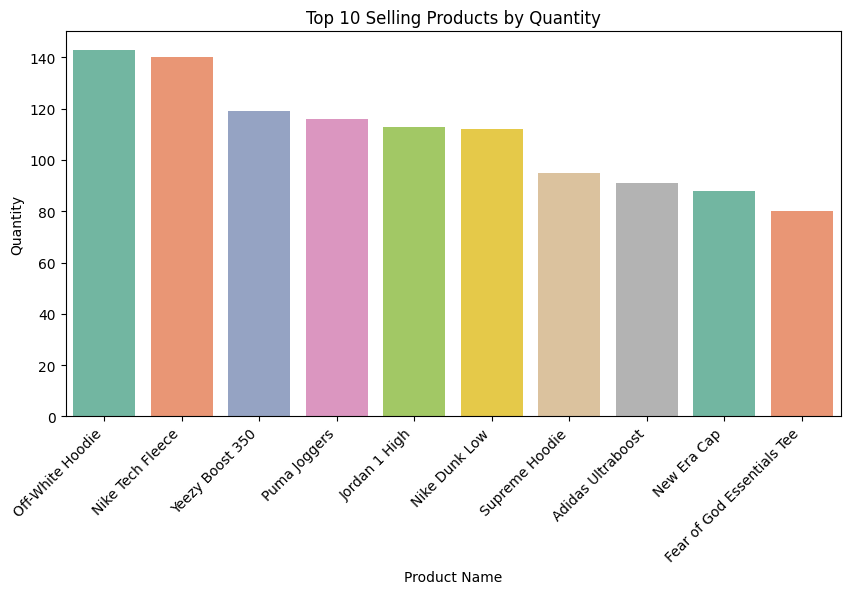

In [4]:
# Group data by product name and sum the quantity sold for each product
qty_grouped = df.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort products by total quantity sold in descending order
qty_sorted = qty_grouped.sort_values(by='Quantity', ascending=False)

# Display the top 10 products by quantity sold
qty_sorted.head(10)

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Create a bar chart of top products by quantity sold
sns.barplot(x=qty_sorted['Product Name'], y=qty_sorted['Quantity'], palette=sns.color_palette("Set2"))

# Add chart title and y-axis label
plt.title('Top 10 Selling Products by Quantity')
plt.ylabel('Quantity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

<br><br>

This code identifies the top-selling products by quantity. First, it groups the dataset by *Product Name* and sums up the total *Quantity* sold for each product. It then sorts the results in descending order to highlight the best-selling items and selects the top 10 products.

Finally, it visualizes these products in a bar chart using Seaborn, with product names on the x-axis and total quantities sold on the y-axis. The chart makes it easy to compare which products had the highest sales volume, helping to spot clear leaders in customer demand.

## Which product type accounts for the largest share of orders?

Product Type
Sneakers    136
Hoodie      121
Joggers      41
Cap          29
T-shirt      26
dtype: int64


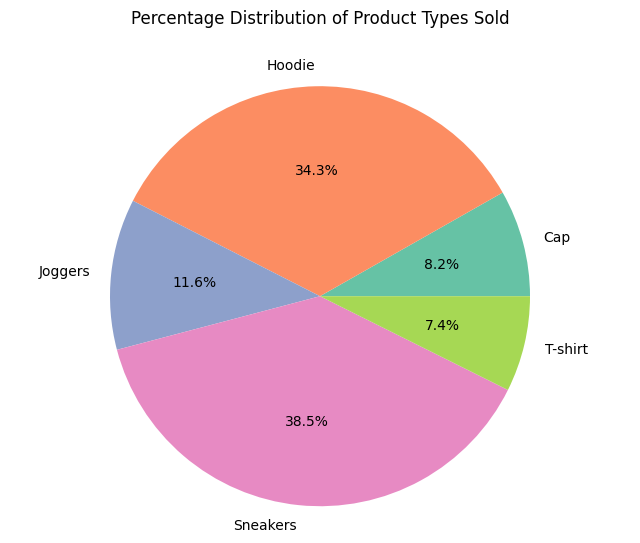

In [5]:
# Group the data by product type and count the number of orders for each type
prod_types = df.groupby('Product Type').size()

# Sort product types by order count in descending order
types_sorted = prod_types.sort_values(ascending=False)

# Display the sorted product type distribution
print(types_sorted)

# Set the figure size for better readability
plt.figure(figsize=(8,6))

# Create a pie chart showing the percentage distribution of product types sold
plt.pie(
    prod_types,                          # Data for the chart
    labels=prod_types.index,             # Product type labels
    autopct='%1.1f%%',                    # Display percentages with 1 decimal place
    colors=sns.color_palette("Set2")      # Choose a visually appealing color palette
)

# Add a descriptive title with extra padding for spacing
plt.title('Percentage Distribution of Product Types Sold', pad=30)

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

<br><br>

To understand which product types dominate the market, I first calculated the total number of orders for each product type. The ordered list shows that Sneakers and Hoodies account for the majority of items sold, followed by Joggers, Caps, and T-shirts.

To visualize this distribution more clearly, I created a pie chart showing the percentage share of each product type. This allows quick insight into the relative popularity of each category across all orders. From the chart, it’s apparent that Sneakers account for the largest share of orders, highlighting their dominant role in the sneaker and streetwear market.

### What was the distribution of payment methods?

Payment Mode
Cash on Delivery    102
Card                 89
Wallet               89
UPI                  73
dtype: int64


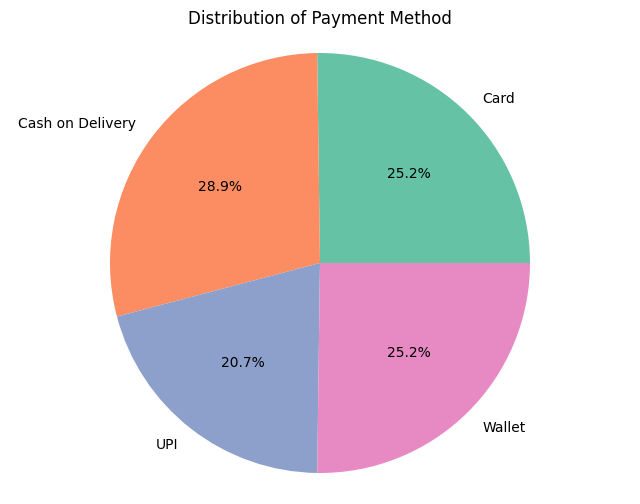

In [6]:
# Count the number of transactions for each payment method
payment = df.groupby('Payment Mode').size()

# Sort payment methods in descending order of transaction count
payment_sorted = payment.sort_values(ascending=False)

# Display the sorted counts to inspect which payment methods are most popular
print(payment_sorted)

# Set figure size for better readability
plt.figure(figsize=(8, 6))

# Create a pie chart to visualize the proportion of each payment method
plt.pie(payment, labels=payment.index, autopct='%1.1f%%',colors=sns.color_palette("Set2"))

# Add title and ensure pie chart is circular
plt.title('Distribution of Payment Method')
plt.axis('equal')

# Display the pie chart
plt.show()

<br><br>

This code analyzes the distribution of payment methods used in the dataset. It first counts the number of transactions for each *Payment Mode* and sorts them in descending order.

The results are then visualized in a pie chart, where each slice represents a payment method and its proportion of total transactions. This visualization makes it easy to see which payment methods are most commonly used by customers, helping identify preferences and trends in purchasing behavior.

### What were the monthly sales trends?

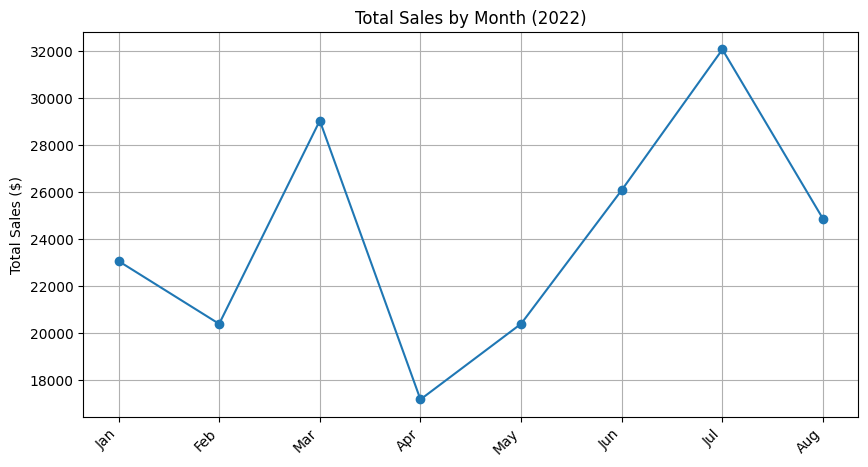

In [7]:
# Convert 'Date' column to datetime format for time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

# Extract year-month period and month name for aggregation and labeling
df['Year_Month'] = df['Date'].dt.to_period('M')
df['Month_Name'] = df['Date'].dt.strftime('%b')

# Group by year-month and sum total sales for each month
monthly_sales = df.groupby('Year_Month')['Amount ($)'].sum().reset_index()

# Add month names to the aggregated dataframe for plotting
monthly_sales['Month_Name'] = monthly_sales['Year_Month'].dt.strftime('%b')

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Plot total sales by month as a line chart with markers
plt.plot(monthly_sales['Month_Name'], monthly_sales['Amount ($)'], marker='o')

# Add y-axis label and chart title
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Month (2022)')

# Rotate x-axis labels for readability and add grid lines
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Display the plot
plt.show()

<br><br>

This code examines how total sales varied over time. First, it adds and then converts the *Date* column to a datetime format and extracts both the year-month period and month name for each transaction.
    
Next, it groups the data by month and sums the *Amount ($)* to calculate total sales for each month.

Finally, the results are visualized in a line chart with month names on the x-axis and total sales on the y-axis. The chart highlights trends and fluctuations in monthly sales throughout 2022, making it easy to identify peak sales periods and seasonal patterns. In this case, we are able to see clear peak sales in March and July. 

### How do sales differ by country?

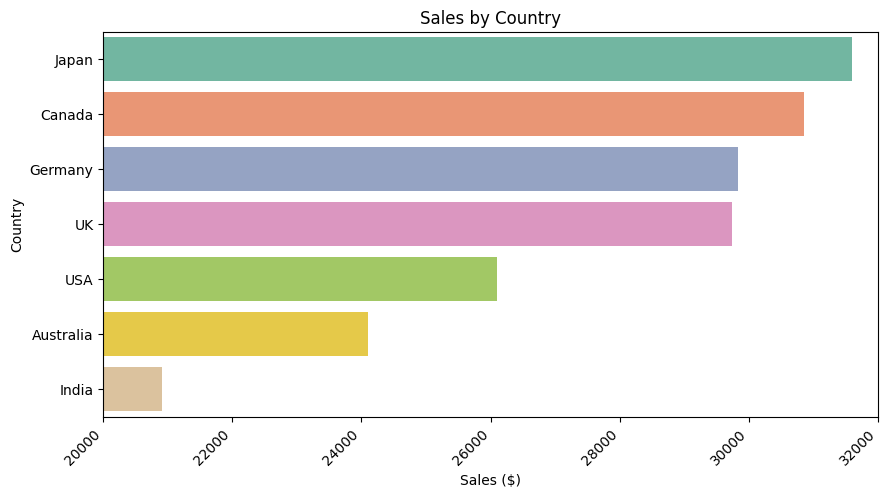

In [59]:
# Group data by country and sum total sales for each country
country_sales = df.groupby('Country')['Amount ($)'].sum().reset_index()

# Sort countries by total sales in descending order
country_sorted = country_sales.sort_values(by='Amount ($)', ascending=False)

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Create a horizontal bar chart showing sales by country
sns.barplot(x=country_sorted['Amount ($)'], y=country_sorted['Country'], palette=sns.color_palette("Set2"))

# Add chart title and axis label
plt.title('Sales by Country')
plt.xlabel('Sales ($)')

# Rotate x-axis labels for readability and set x-axis limits to focus on key range
plt.xticks(rotation=45, ha='right')
plt.xlim(20000, 32000) 

# Display the plot
plt.show()

<br><br>

This code analyzes total sales by country. First, it groups the dataset by *Country* and sums the *Amount ($)* to calculate total revenue per country, then sorts the results in descending order.

The horizontal bar chart displays these countries along the y-axis with their corresponding sales amounts on the x-axis. This makes it easy to compare which countries contributed most to revenue.

In [9]:
# Create an interactive choropleth map to visualize total sales by country
fig = px.choropleth(
    country_sales,                  # Dataframe containing country sales
    locations='Country',            # Column with country names
    locationmode='country names',   # Interpret locations as country names
    color='Amount ($)',             # Use total sales to determine color intensity
    color_continuous_scale='YlGnBu',  # Orange-Red color scale for sales values
    title='Sales by Country',       # Chart title
    width=1000,                     # Set chart width
    height=700                      # Set chart height
)

# Display the interactive choropleth map
fig.show()

Additionally, a choropleth map visualizes total sales geographically, using color intensity to represent sales volume for each country. The map provides a clear, global view of sales distribution, highlighting high-performing regions and enabling quick identification of international trends.

## 4. Key Insights and Recommendations

The analysis highlights the products, regions, and payment methods driving revenue in the global sneaker and streetwear market. Sneakers and hoodies account for the majority of orders, while cash emerges as the most preferred payment method. Monthly sales trends show clear seasonal fluctuations, and Japan, Canada, Germany, and the UK being the top-selling countries.

**Recommendations:** Prioritize inventory and marketing for top-selling products, streamline checkout for cash transactions, and focus promotional efforts on these high-performing countries to maximize revenue and operational efficiency.

## 5. Predictive Insight: Next Month's Sales

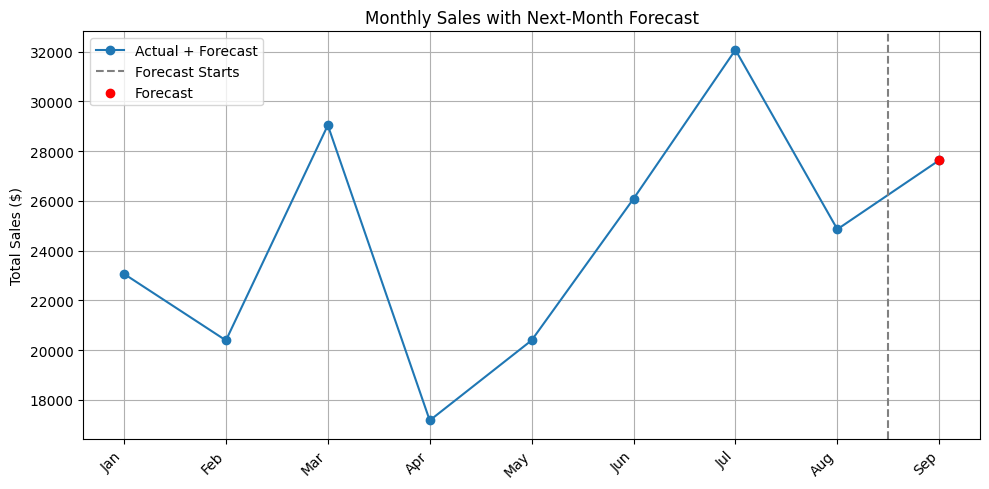

Estimated total sales for next month (Sep 2022): $27,636.79


In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Add numeric month column for regression
monthly_sales['Month_Num'] = np.arange(1, len(monthly_sales) + 1)  # 1..N

# Define predictor (feature) and target variable
X = monthly_sales[['Month_Num']]          # Feature: month number (must be 2D for sklearn)
y = monthly_sales['Amount ($)']           # Target: monthly total sales

# Initialize and fit a simple linear regression to capture sales trend
model = LinearRegression()
model.fit(X, y)

# Predict sales for the next month using the trained model
next_month_num = monthly_sales['Month_Num'].max() + 1
next_month_sales = model.predict(np.array([[next_month_num]]))[0]

# Build a new row representing the forecasted month
next_period = monthly_sales['Year_Month'].max() + 1          # Next period (e.g., 2022-09)
next_month_name = next_period.to_timestamp().strftime('%b')  # Convert period to short month name (e.g., 'Sep')

next_row = pd.DataFrame({
    'Year_Month': [next_period],
    'Month_Name': [next_month_name],
    'Amount ($)': [next_month_sales],
    'Month_Num': [next_month_num]
})

# Append the forecast row to monthly_sales
monthly_sales = pd.concat([monthly_sales, next_row], ignore_index=True)

plt.figure(figsize=(10, 5))

# Plot historical + forecast line using Month_Num on x axis
plt.plot(monthly_sales['Month_Num'], monthly_sales['Amount ($)'], marker='o', label='Actual + Forecast')

# Draw vertical line at the boundary: last actual month (second-to-last row after append)
last_actual_x = monthly_sales['Month_Num'].iloc[-2]   # numeric coordinate of last real month
plt.axvline(x=last_actual_x + 0.5, color='gray', linestyle='--', label='Forecast Starts')  
# +0.5 positions the line between the last actual and the forecast point

# Highlight the forecast point
plt.scatter(monthly_sales['Month_Num'].iloc[-1], monthly_sales['Amount ($)'].iloc[-1],
            color='red', zorder=5, label='Forecast')

# Replace numeric ticks with month name labels for readability
plt.xticks(monthly_sales['Month_Num'], monthly_sales['Month_Name'], rotation=45, ha='right')

# Add axis labels, title, legend, and grid
plt.ylabel('Total Sales ($)')
plt.title('Monthly Sales with Next-Month Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the numeric forecast
print(f"Estimated total sales for next month ({next_month_name} 2022): ${next_month_sales:,.2f}")

To explore potential future trends, I applied a simple linear regression model to the historical monthly sales data. First, I converted each month into a numeric value (*Month_Num*) so the regression algorithm could analyze the relationship between time and sales. The model was trained on all available months of sales to capture the overall trend.

Using this model, I forecasted sales for the next month by extrapolating the trend forward by one step. The final chart visualizes both historical sales and the predicted value: the vertical dashed line indicates where the forecast begins, and the red marker highlights the estimated next-month sales (September: $27,636.79).